In [6]:
import jax
import matplotlib.pyplot as plt
import numpy as np
from models import CatCNOT, CrossResonanceGate

import dynamiqs as dq


def is_gpu_available() -> bool:
    return any('cuda' in str(device) for device in jax.devices())


speedups = {}

In [7]:
# init models
models = {'Cross Resonance Gate': CrossResonanceGate(),
          'Cat Qubit CNOT': CatCNOT()}

for label, model in models.items():
    print(f'Running benchmark for {label}')  # noqa: T201
    # run the model once to JIT compile
    model.run_dynamiqs()

    # benchmark models
    dq.set_device('cpu')
    timer_qutip_cpu = %timeit -o model.run_qutip()
    timer_dynamiqs_cpu = %timeit -o model.run_dynamiqs()
    if is_gpu_available():
        dq.set_device('gpu')
        timer_dynamiqs_gpu = %timeit -o model.run_dynamiqs()

    # store results
    speedup_cpu = timer_qutip_cpu.average / timer_dynamiqs_cpu.average
    if is_gpu_available():
        speedup_gpu = timer_qutip_cpu.average / timer_dynamiqs_gpu.average
        speedups[label] = (1.0, speedup_cpu, speedup_gpu)
    else:
        speedups[label] = (1.0, speedup_cpu)


Running benchmark for Cross Resonance Gate
2.54 ms ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.15 ms ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running benchmark for Cat Qubit CNOT
4.64 s ± 433 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


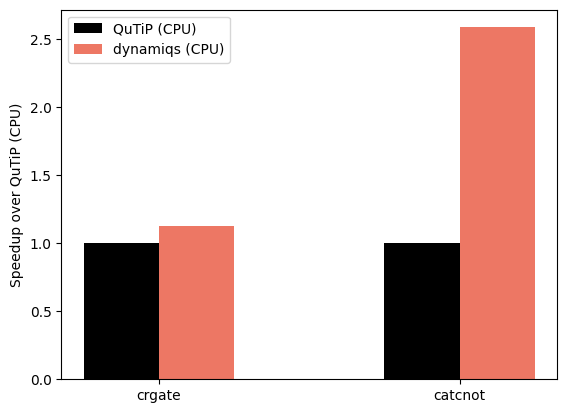

In [ ]:
fig, ax = plt.subplots()
groups = np.arange(len(models))
colors = ['k', '#ed7764']
width = 0.45
labels = ['QuTiP (CPU)', 'dynamiqs (CPU)']

for i, label in enumerate(labels):
    offset = width * i
    speedup = [speedups[model][i] for model in models]
    ax.bar(groups + offset, speedup, width, color=colors[i], label=label)

ax.legend()
ax.set_ylabel("Speedup over QuTiP (CPU)")
ax.set_xticks(groups + 0.5 * width, list(models.keys()))
plt.show()